In [1]:
import os
import pandas as pd

DATA_FILE_PATH = os.path.abspath("../data.csv")
with open(DATA_FILE_PATH, "r") as f:
    data = pd.read_csv(f, index_col=0)

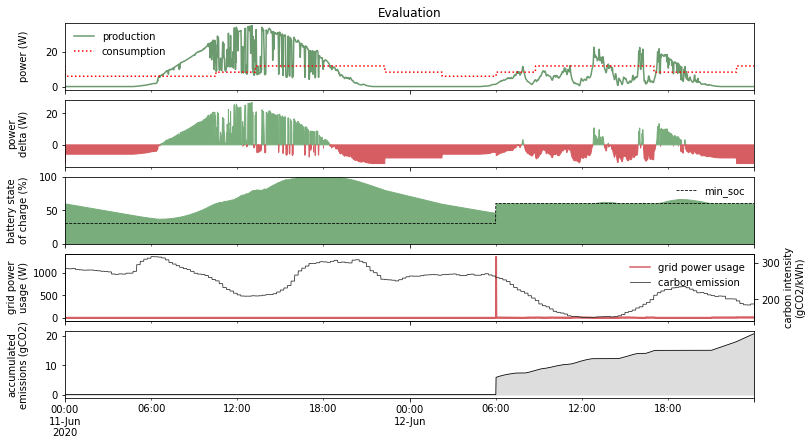

In [2]:
from vessim.analysis import plot_evaluation

plot_evaluation(data)